### Project - Air quality prediction (Regression) - Nehal Bendale

### Problem Statement - To predict Сoncentration of CO (Carbon monoxide), μg/m3 for air quality

### About Dataset
This dataset contains air quality data from the national capital of Delhi, India. It includes information on air pollution levels, including particulate matter (PM2.5 and PM10) levels, nitrogen dioxide (NO2), sulfur dioxide (SO2), carbon dioxide (CO2), ozone (O3), and other pollutants. The data was collected from monitoring stations located in various areas of Delhi between November 25, 2020, and January 24, 2023. This dataset is a valuable resource for researchers and policymakers to better understand air quality in Delhi and its impacts on public health.
The data is based on the amount of particulate matter in the air, which is measured in micrograms per cubic meter (µg/m³). The particulate matter includes dust, smoke, and other small particles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('delhi_aqi.csv')
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


importing our dataset.

In [3]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


First five rows of dataset

In [4]:
df.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


Last five rows of dataset.

# Exploratory Data Anaysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Checking data types of all columns,There is no categorical column.

In [6]:
df.size

168984

Total data point of dataset are 168984.

In [7]:
df.shape

(18776, 9)

There are 18776 rows and 9 columns in our dataset.

In [8]:
col_use=['no','no2','o3','so2','pm2_5','pm10','nh3','co']
df=df[col_use]

Feature selection for regression model. lets drop the date column.

In [9]:
df.shape

(18776, 8)

There are 18776 rows and 8 columns in our dataset.

In [10]:
df.describe()

,no,no2,o3,so2,pm2_5,pm10,nh3,co
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815,2929.228628
std,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108,2854.523506
min,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000,260.350000
25%,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000,1068.120000
50%,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000,1842.500000
75%,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000,3685.000000
max,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000,21148.680000


Description of data between 0 to 1.

In [11]:
df.skew()

no       2.808154
no2      2.034090
o3       1.996670
so2      2.669684
pm2_5    1.949415
pm10     1.867981
nh3      3.568289
co       2.005147
dtype: float64

Data is mostly right skewed

In [12]:
df.isnull().sum()

no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
co       0
dtype: int64

There are no missing values in our dataset.

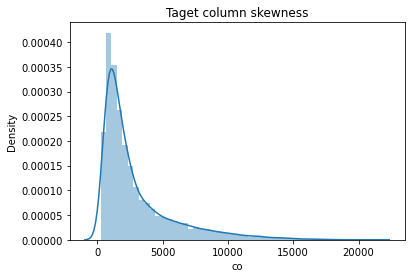

In [13]:
sns.distplot(df['co'])
plt.title("Taget column skewness");

Target column is right skewed

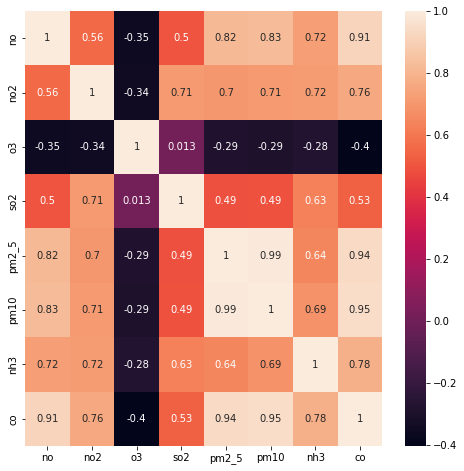

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is good correaltion of features with target column (co) 

<Figure size 720x720 with 0 Axes>

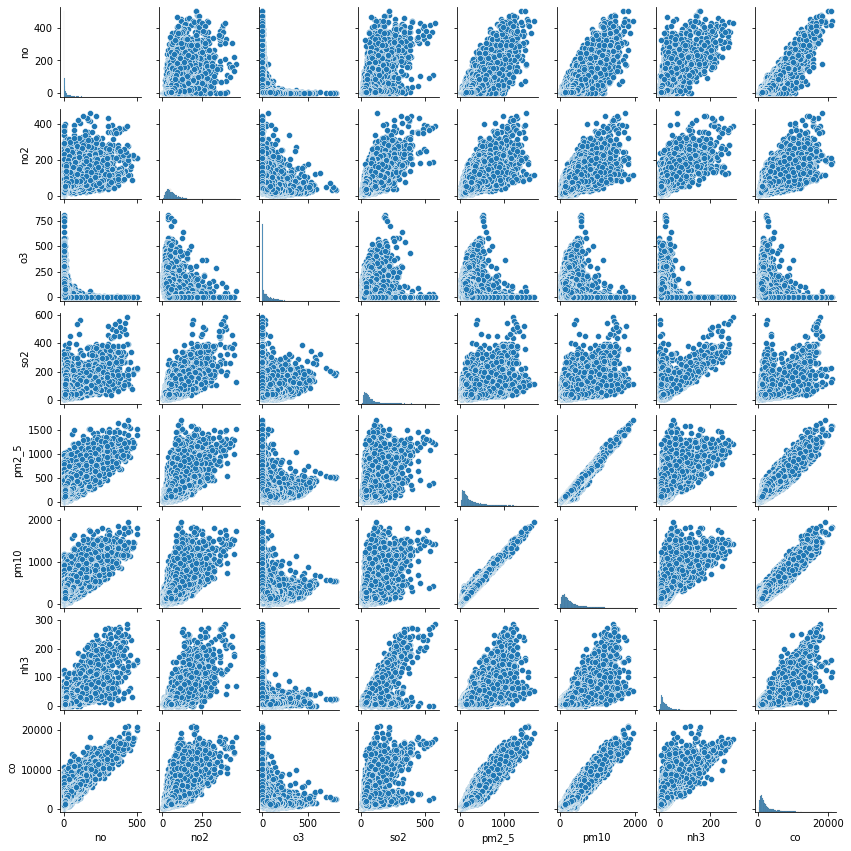

In [15]:
plt.figure(figsize=(10,10))
sns.pairplot(df,height=1.5)
plt.show()

checking relationships between variables of data

Now ,Lets check outlier in our data.

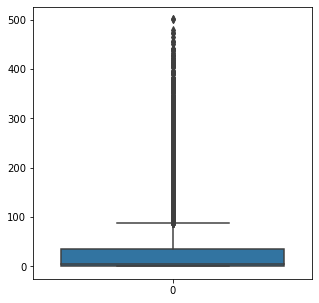

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['no'])
plt.show()

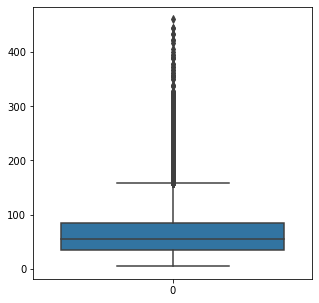

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['no2'])
plt.show()

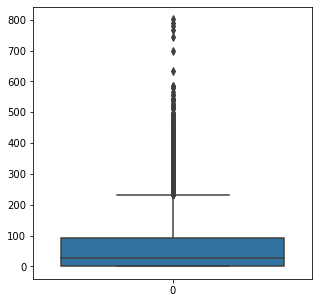

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['o3'])
plt.show()

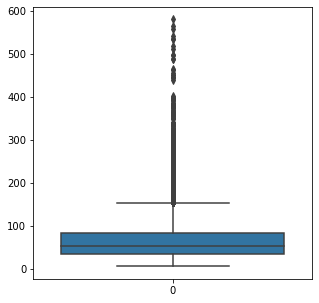

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['so2'])
plt.show()

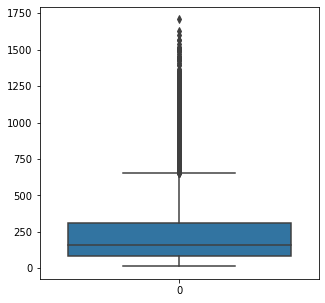

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['pm2_5'])
plt.show()

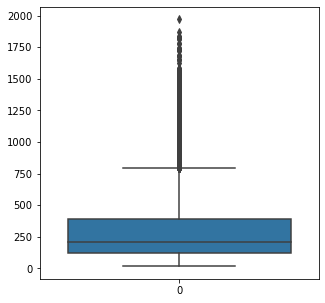

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['pm10'])
plt.show()

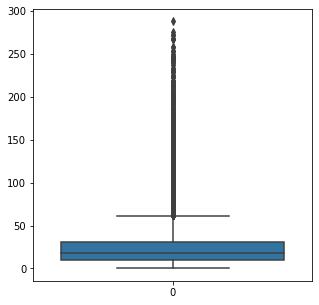

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['nh3'])
plt.show()

There are outliers present in each column of data so lets remove outliers by quantile method

In [23]:
for cols in df.columns[:-1]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[ (df[cols]>high)] = df[cols].median()

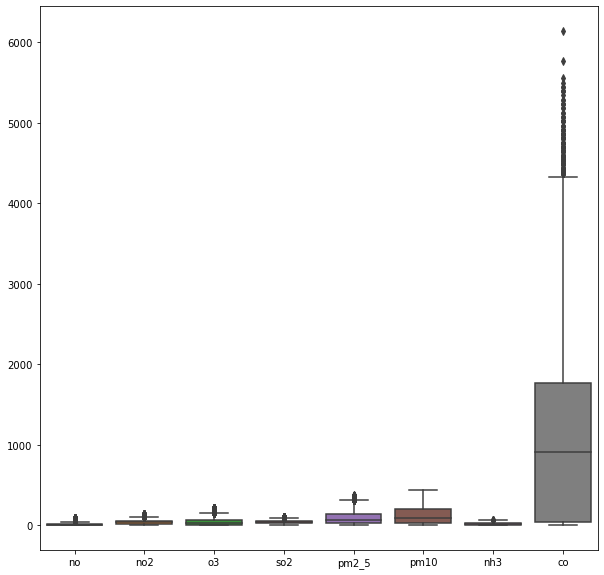

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

### Simple Linear Regression

As pm10 has highest correlation with target column hence lets take pm10 as a dependent varaibale for prediction.

In [25]:
X=df['pm10'].values.reshape(-1,1)
Y=df['co'].values

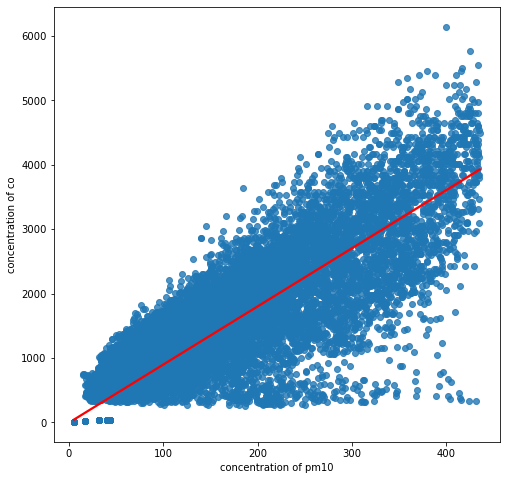

In [26]:
plt.figure(figsize=(8,8));
sns.regplot(X, Y,line_kws={"color": "red"});
plt.xlabel('concentration of pm10')
plt.ylabel("concentration of co")
plt.show();

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print("training score is",model.score(X_train,y_train))

training score is 0.7967184939351699


In [31]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.7956719159553969


In [32]:
y_Pred=model.predict(X_test)

In [33]:
print("r2 score is ", r2_score(y_Pred,y_test))

r2 score is  0.7410127943196709


In [34]:
y_Pred

array([  44.16779145,  280.43102189,   44.16779145, ..., 2133.05192879,
        981.47142343, 1264.77104071])

### Multiple Linear Regression

In [35]:
X=df.drop('co',axis=1)
X.shape

(18776, 7)

In [36]:
Y=df['co']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
print("training score is",model.score(X_train,y_train))

training score is 0.8874822342048637


In [41]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.8835719781942853


In [42]:
y_Pred=model.predict(X_test)

In [43]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.868104641863981


In [44]:
y_Pred

array([ -33.96492053,  301.75311197,  -33.96492053, ..., 2281.22254099,
       1099.98010073, 1265.30760173])

### KNN Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [46]:
print("training score is",model.score(X_train,y_train))

training score is 0.989339737984033


In [47]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9840714407022154


In [48]:
y_Pred=model.predict(X_test)

In [49]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9837146913411823


In [50]:
y_Pred

array([   5.25 ,   31.47 ,    5.25 , ..., 2152.254, 1279.068, 1332.474])

### SVM Regression

In [51]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)

SVR()

In [52]:
print("training score is",model.score(X_train,y_train))

training score is 0.7127840686560913


In [53]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.7037327473533861


In [54]:
y_Pred=model.predict(X_test)

In [55]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.3438149531590795


In [56]:
y_Pred

array([   5.34951249,   31.57000829,    5.34951249, ..., 1931.20682045,
       1121.61083842, 1264.82218826])

### Decision tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
print("training score is",model.score(X_train,y_train))

training score is 1.0


In [59]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9705250230733956


In [60]:
y_Pred=model.predict(X_test)

In [61]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9707909641173792


In [62]:
y_Pred

array([   5.25,   31.47,    5.25, ..., 2456.67, 1068.12, 1401.9 ])

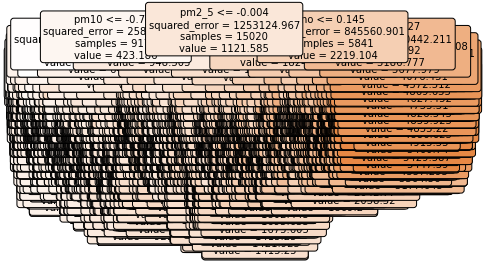

In [63]:
tree.plot_tree(model,feature_names=X.columns,filled=True,rounded=True,fontsize=10);

### Hyperpametric Tunning

In [64]:
#Hyperpametric Tunning
#Hyper para
hyperpara=dict(criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"],max_depth=list(range(1,100)),min_samples_split=list(range(1,100)),min_samples_leaf=list(range(1,100)))
#Grid search
random=RandomizedSearchCV(estimator=model,param_distributions=hyperpara,cv=10)
#Fit
random.fit(X_train,y_train)
#Best estimatot
random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=18,
                      min_samples_leaf=18, min_samples_split=52)

In [65]:
#DT after pruning
#Algoritm
model=DecisionTreeRegressor(criterion='absolute_error', max_depth=21, min_samples_leaf=19, min_samples_split=33)
#fit
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=21,
                      min_samples_leaf=19, min_samples_split=33)

In [66]:
print("training score is",model.score(X_train,y_train))

training score is 0.9802904734752262


In [67]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9725635540876725


In [68]:
y_Pred=model.predict(X_test)

In [69]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9722117834890085


### Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
print("training score is",model.score(X_train,y_train))

training score is 0.9979894048629954


In [72]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9850715918355019


In [73]:
y_Pred=model.predict(X_test)

In [74]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9849492284947652


In [75]:
y_Pred

array([   5.25  ,   31.47  ,    5.25  , ..., 2311.4018, 1149.96  ,
       1372.3943])

In [76]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9849492284947652


### Extra Tree Regression

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
Extratree_model=ExtraTreesRegressor()
Extratree_model.fit(X_train,y_train)

ExtraTreesRegressor()

In [78]:
print("training score is",Extratree_model.score(X_train,y_train))

training score is 0.9999999995557126


In [79]:
print("testing score is",Extratree_model.score(X_test,y_test))

testing score is 0.9864797713659841


In [80]:
y_Pred=Extratree_model.predict(X_test)

In [81]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9863768513617713


### Bagging Regression

In [82]:
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [83]:
print("training score is",model.score(X_train,y_train))

training score is 0.9972259481331187


In [84]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9832593326092884


In [85]:
y_Pred=model.predict(X_test)

In [86]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9831149011965051


### Adaboost

In [87]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(X_train,y_train)

AdaBoostRegressor()

In [88]:
print("training score is",model.score(X_train,y_train))

training score is 0.9404373232205606


In [89]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.936842841990327


In [90]:
y_Pred=model.predict(X_test)

In [91]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9224575208504174


### Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [93]:
print("training score is",model.score(X_train,y_train))

training score is 0.9839023238610118


In [94]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9806330321263327


In [95]:
y_Pred=model.predict(X_test)

In [96]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9804535292933145


### Xgboost

In [97]:
from xgboost.sklearn import XGBRegressor
model= XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
print("training score is",model.score(X_train,y_train))

training score is 0.9962787554166018


In [99]:
print("testing score is",model.score(X_test,y_test))

testing score is 0.9851247536622952


In [100]:
y_Pred=model.predict(X_test)

In [101]:
print("r2 score is", r2_score(y_Pred,y_test))

r2 score is 0.9851313507826874


### Result

In [102]:
result=pd.DataFrame({"Algorithm":["simple regression","Multiple Regression","KNN","SVM","DT","DT after hyperparametric Tunning","Random Forest regressor","Extra Trees Regressor","Bagging Regressor","Adaboost Regressor","Gradient Boosting","XgBoost"],"Traning Score":[0.7967,0.8874,0.9893,0.7127,1,0.9802,0.9980,0.9999,0.9971,0.9325,0.9839,0.9962],"Testing Score":[0.7956,0.8835,0.9840,0.7037,0.9701,0.9723,0.9850,0.9865,0.9838,0.9289,0.9806,0.9851],"r2 value":[0.7410,0.8681,0.9837,0.3438,0.9704,0.9719,0.9849,0.9864,0.9837,0.9102,0.9804,0.9851]},index=list(range(1,13)))
result

,Algorithm,Traning Score,Testing Score,r2 value
1,simple regression,0.7967,0.7956,0.7410
2,Multiple Regression,0.8874,0.8835,0.8681
3,KNN,0.9893,0.9840,0.9837
4,SVM,0.7127,0.7037,0.3438
5,DT,1.0000,0.9701,0.9704
6,DT after hyperparametric Tunning,0.9802,0.9723,0.9719
7,Random Forest regressor,0.9980,0.9850,0.9849
8,Extra Trees Regressor,0.9999,0.9865,0.9864
9,Bagging Regressor,0.9971,0.9838,0.9837
10,Adaboost Regressor,0.9325,0.9289,0.9102


### Conclusion 
The result shows that Extra Tree regressor has the highest r2 score 0.9864 which is the best performance parameter in case of regression.
Hence Extra Tree regressor will be choosen for further regressions.

### Predictions

In [103]:
#Actual value and the predicted value
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value': Extratree_model.predict(X_test)})
prediction["Percentage error"]=(prediction["Actual value"]-prediction["Predicted value"])/prediction["Predicted value"]

In [104]:
prediction.head(10)

,Actual value,Predicted value,Percentage error
10876,5.25,5.2500,0.000000e+00
13204,31.47,31.4700,-6.999309e-15
1862,5.25,5.2500,0.000000e+00
2699,947.95,1036.0050,-8.499476e-02
18191,1455.31,1375.4643,5.805000e-02
18473,16.47,16.4700,1.315820e-14
8404,43.18,43.1800,-6.088486e-15
11830,2082.82,1925.5445,8.167846e-02
13106,1895.90,1908.5882,-6.647951e-03
8658,1428.60,1422.8635,4.031659e-03


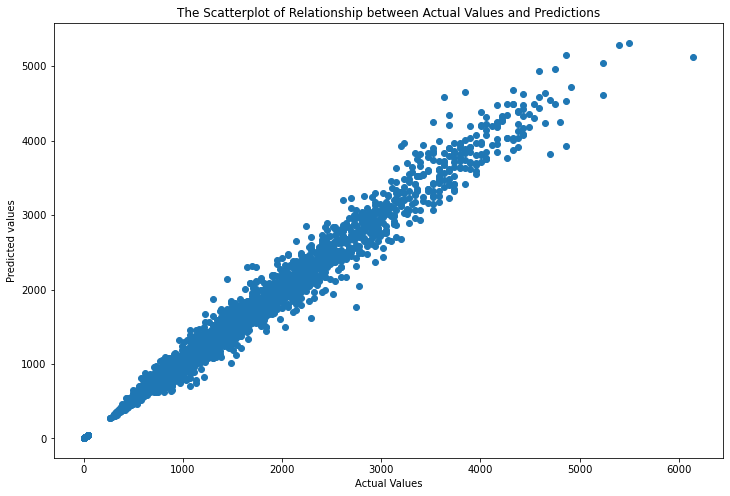

In [105]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(prediction['Actual value'], prediction['Predicted value']);

### Thank you